Importing Libraries

In [7]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 525.1 kB/s eta 0:03:10
   ---------------------------------------- 0.1/99.8 MB 655.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 860.2 kB/s eta 0:01:56
   ---------------------------------------- 0.3/99.8 MB 827.5 kB/s eta 0:02:01
   ---------------------------------------- 0.3/99.8 MB 803.7 kB/s eta 0:02:04
   ---------------------------------------- 0.3/99.8 MB 791.9 kB/s eta 0:02:06
   --------------------

In [11]:
# import necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

Load The Dataset

In [12]:
# Load the data
df = pd.read_csv("car data.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
# checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
df.shape

(301, 9)

In [18]:
df.sample(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
217,eon,2016,3.15,4.43,15000,Petrol,Dealer,Manual,0
75,etios g,2015,3.95,6.80,36000,Petrol,Dealer,Manual,0
162,Bajaj Pulsar NS 200,2012,0.45,0.99,14500,Petrol,Individual,Manual,0
27,swift,2017,6.00,6.49,16200,Petrol,Individual,Manual,0


In [20]:
# Calculate the correlation matrix
numeric_columns = df[['Year', 'Selling_Price', 'Present_Price',
'Kms_Driven','Owner']]
correlation_matrix = numeric_columns.corr()

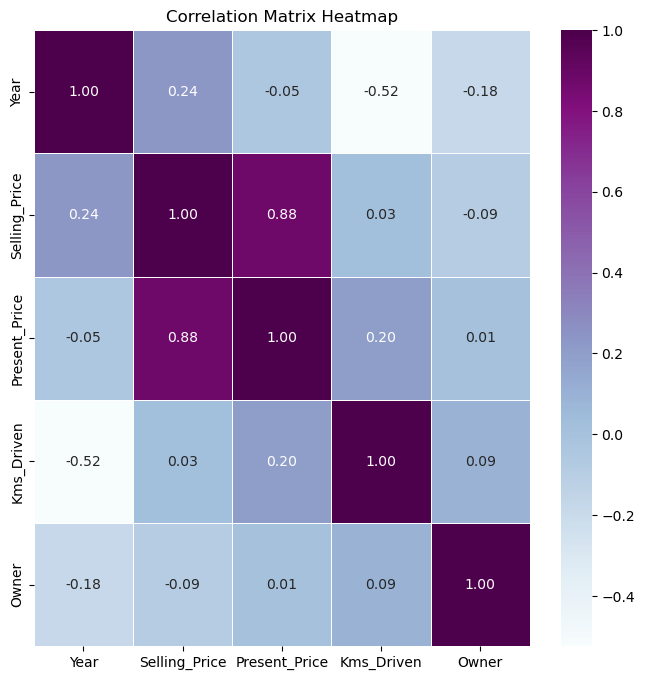

In [21]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f",
linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
# top 10
top_car = df["Car_Name"].value_counts().nlargest(10)

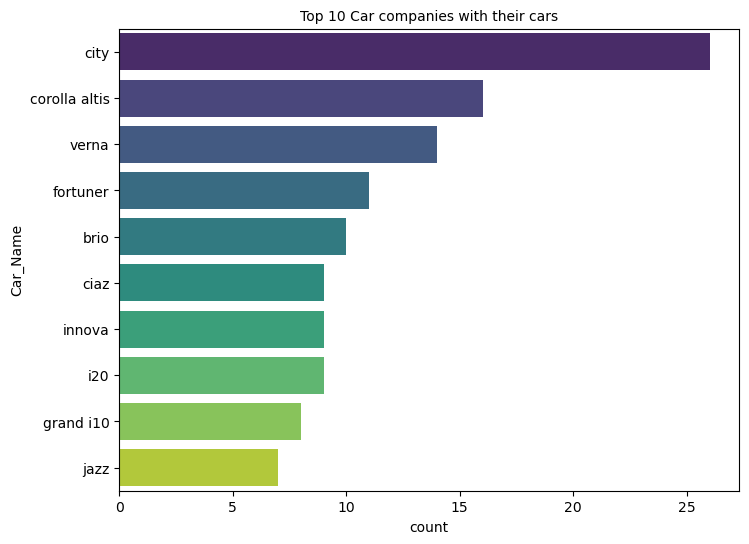

In [25]:
# Top 10 Companies with highest number of used cars for sale
plt.figure(figsize = (8, 6))
sns.countplot(y = df.Car_Name, order=top_car.index, palette='viridis')
plt.title("Top 10 Car companies with their cars", fontsize = 10)
plt.show()

In [27]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

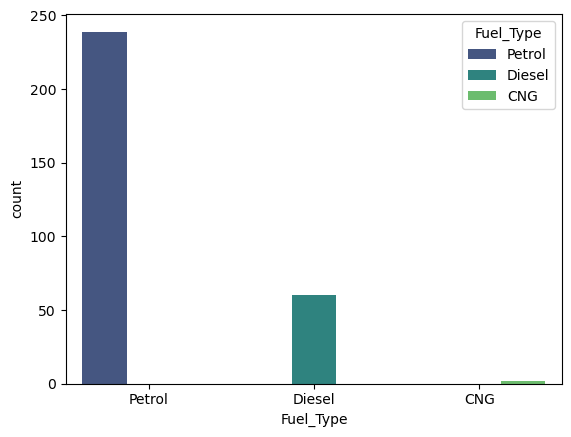

In [28]:
sns.countplot(x=df['Fuel_Type'],hue=df['Fuel_Type'],
palette='viridis')

In [30]:
df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

<Axes: xlabel='Seller_Type', ylabel='count'>

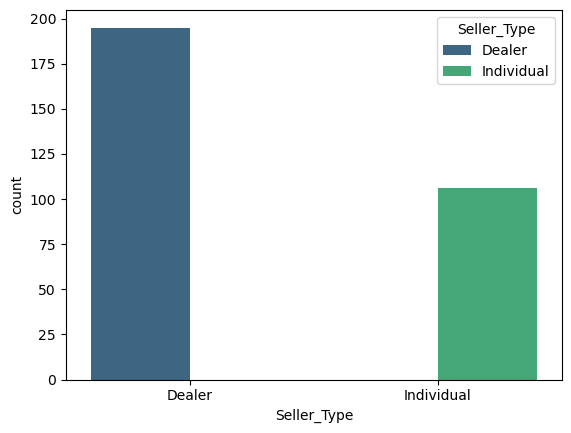

In [35]:
sns.countplot(x=df['Seller_Type'],hue=df['Seller_Type'],
palette='viridis')

In [36]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

We can see that most of the cars are 'Manual'

In [37]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

<Axes: xlabel='Selling_Price'>

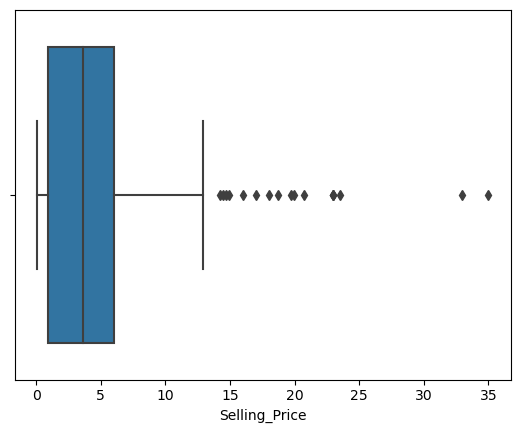

In [38]:
sns.boxplot(x=df['Selling_Price'])

In [39]:
percentile_75 = np.percentile(df['Selling_Price'],75)
sum(df['Selling_Price']>percentile_75)

74

There are 74 cars out of 301 having Selling_Price > 75th_Percentile

<Axes: xlabel='Selling_Price', ylabel='Count'>

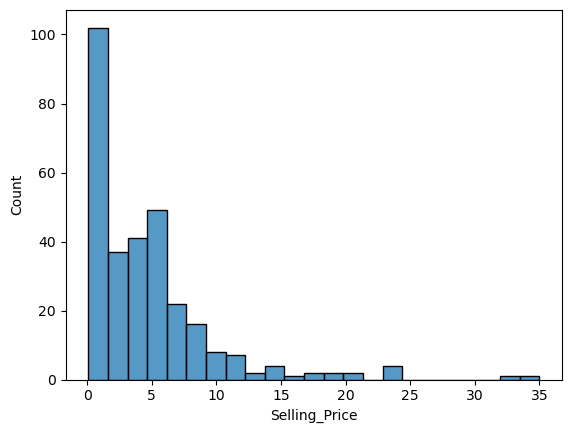

In [41]:
sns.histplot(df['Selling_Price'])

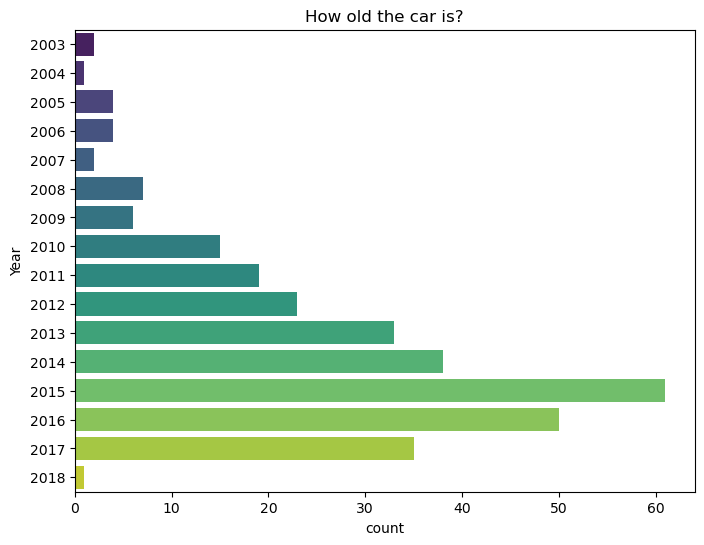

In [42]:
plt.figure(figsize = (8,6))
sns.countplot(y=df['Year'],palette = 'viridis')
plt.title('How old the car is?')
plt.show()

Most of the car models are of 2015

<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

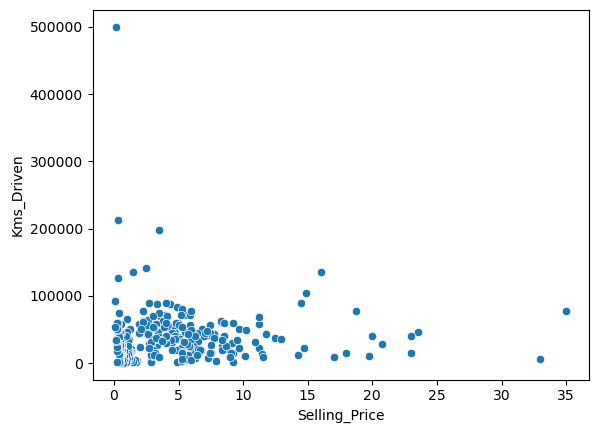

In [47]:
sns.scatterplot(x=df['Selling_Price'],y=df['Kms_Driven'])

In [48]:
# Extracting non-numerical columns
df.select_dtypes(include=['object']).columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

Label Encoding

In [49]:
# Create a label encoder object
label_encoder = LabelEncoder()

In [57]:
# Convert the categorical columns to numerical using LabelEncoder
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])

In [58]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_type
0,90,2014,3.35,5.59,27000,2,0,1,0,0
1,93,2013,4.75,9.54,43000,1,0,1,0,0
2,68,2017,7.25,9.85,6900,2,0,1,0,0
3,96,2011,2.85,4.15,5200,2,0,1,0,0
4,92,2014,4.60,6.87,42450,1,0,1,0,0


Spliting into training and testing data

In [59]:
# Select features (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=35)

Scaling the datapoints to a comman range

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building

Linear Regression
• Decision Tree Regressor
• Random Forest Regressor
• XGBoost Regressor
• MLP Regressor

In [63]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_scaled)

# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100,
random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_scaled)

# XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective ='reg:squarederror',
colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators
= 100, random_state=42)
xgboost_reg.fit(X_train_scaled, y_train)
xgboost_predictions = xgboost_reg.predict(X_test_scaled)

# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000,
random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
mlp_predictions = mlp_reg.predict(X_test_scaled)

Model Evaluation
1. Mean_squared_Error
2. R_squared_Error

In [66]:
# Evaluate the models
models = {'Linear Regression': linear_reg, 'Decision Tree Regressor':
decision_tree_reg,'Random Forest Regressor': random_forest_reg, 'XGBoostRegressor': xgboost_reg,'MLP Regressor': mlp_reg}
for name, model in models.items():
 predictions = model.predict(X_test_scaled)
 mse = mean_squared_error(y_test, predictions)
 r2 = r2_score(y_test, predictions)
 print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

Linear Regression - Mean Squared Error: 6.496077643265628, R-squared: 0.7692998621971519
Decision Tree Regressor - Mean Squared Error: 2.4335295081967208, R-squared: 0.9135762188017733
Random Forest Regressor - Mean Squared Error: 3.2487275962295072, R-squared: 0.8846254701233385
XGBoostRegressor - Mean Squared Error: 7.718937324614206, R-squared: 0.7258715178187365
MLP Regressor - Mean Squared Error: 1.2703921944429941, R-squared: 0.9548835973927294


The best Model is MLP Regressor having least mse (1.27) and highest r2_score (0.95)

In [69]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest',
'XGBoost', 'MLP']

# Corresponding MSE and R² scores
mse_scores = [6.49, 2.43, 3.24, 7.71, 1.27]
r2_scores = [0.77, 0.92, 0.88, 0.72, 0.95]

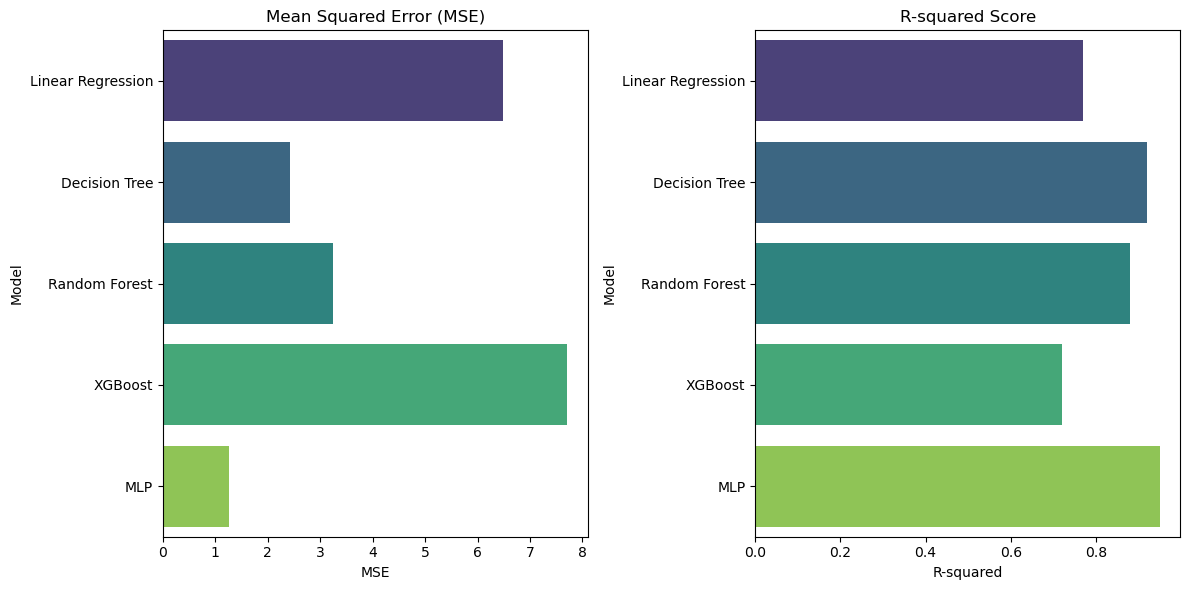

In [72]:
# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R_squared': r2_scores})

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=performance_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('MSE')

# Bar plot for R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='R_squared', y='Model', data=performance_df, palette='viridis')
plt.title('R-squared Score')
plt.xlabel('R-squared')
plt.tight_layout()
plt.show()

Saved the trained MLP model

In [73]:
# import joblib

In [74]:
# # Save the trained model to a file
# joblib.dump(mlp_reg, 'mlp_regressor_model.pkl')

['mlp_regressor_model.pkl']